In [3]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib  inline

In [19]:
df=pd.read_csv(r"C:\Users\SWETHA SREE\OneDrive\Documents\swetha\CRYPTOCURRENCY\zcash data.csv")

In [21]:
df.head()

,ticker,date,open,high,low,close
0,ZEC,28-10-16,2100.0,5000.0,2100.0,5000.0
1,ZEC,29-10-16,12001.0,30000.0,4000.0,4000.0
2,ZEC,30-10-16,4000.0,4000.0,475.0,650.0
3,ZEC,31-10-16,650.0,3000.0,475.0,1600.0
4,ZEC,01-11-16,1600.0,2175.0,1200.0,1550.0


In [23]:
df.tail()

,ticker,date,open,high,low,close
2799,ZEC,27-06-24,19.9146,20.9209,19.7458,20.8776
2800,ZEC,28-06-24,20.8820,21.1982,20.6169,20.9981
2801,ZEC,29-06-24,20.9682,20.9682,20.2669,20.3254
2802,ZEC,30-06-24,20.3254,20.9310,19.7975,20.4483
2803,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
df.drop(2803,axis=0,inplace=True)

In [27]:
df.tail()

,ticker,date,open,high,low,close
2798,ZEC,26-06-24,20.2054,20.4478,19.4942,19.9264
2799,ZEC,27-06-24,19.9146,20.9209,19.7458,20.8776
2800,ZEC,28-06-24,20.8820,21.1982,20.6169,20.9981
2801,ZEC,29-06-24,20.9682,20.9682,20.2669,20.3254
2802,ZEC,30-06-24,20.3254,20.9310,19.7975,20.4483


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2803 entries, 0 to 2802
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ticker  2803 non-null   object 
 1   date    2803 non-null   object 
 2   open    2803 non-null   float64
 3   high    2803 non-null   float64
 4   low     2803 non-null   float64
 5   close   2803 non-null   float64
dtypes: float64(4), object(2)
memory usage: 131.5+ KB


In [45]:
x=df.drop(['ticker','open','high','low'],axis=1)

In [47]:
x.set_index('date',inplace=True)

KeyError: "None of ['date'] are in the columns"

In [49]:
x.head()

,close
date,
28-10-16,5000.0
29-10-16,4000.0
30-10-16,650.0
31-10-16,1600.0
01-11-16,1550.0


In [51]:
x.describe()

,close
count,2803.000000
mean,113.487386
std,163.164282
min,19.623900
25%,39.911400
50%,64.980000
75%,144.814500
max,5000.000000


In [ ]:
visualization

<Axes: xlabel='date'>

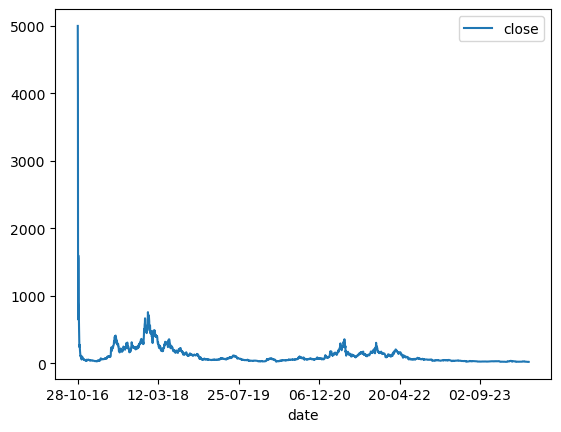

In [55]:
x.plot()

In [57]:
from statsmodels.tsa.stattools import adfuller

In [59]:
test_result=adfuller(df['close'])

In [79]:
#H0: it is non stationarity
#H1:it is stationarity

def adfuller_test(close):
    result=adfuller(close)
    labels=['ADF test statistic','p-value','#lags used','number os observations used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("rejece null hypothesis, indicating the data is stationary")
    else:
        print("the data is non stationarity")

In [81]:
adfuller_test(df['close'])

ADF test statistic : -2.9433326695881434
p-value : 0.0405360781185501
#lags used : 28
number os observations used : 2774
rejece null hypothesis, indicating the data is stationary


In [ ]:
#auto regressive model

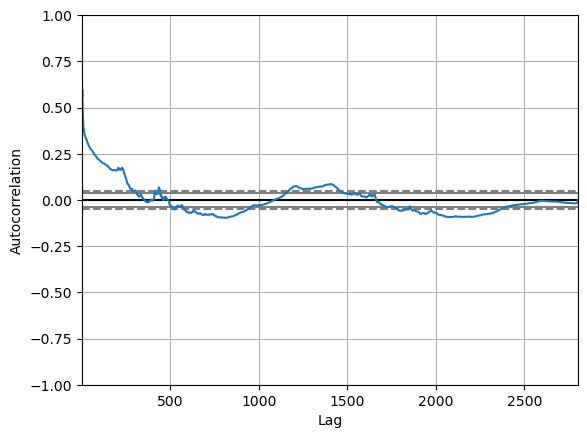

In [85]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['close'])
plt.show()

In [125]:
#acf&pacf

import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

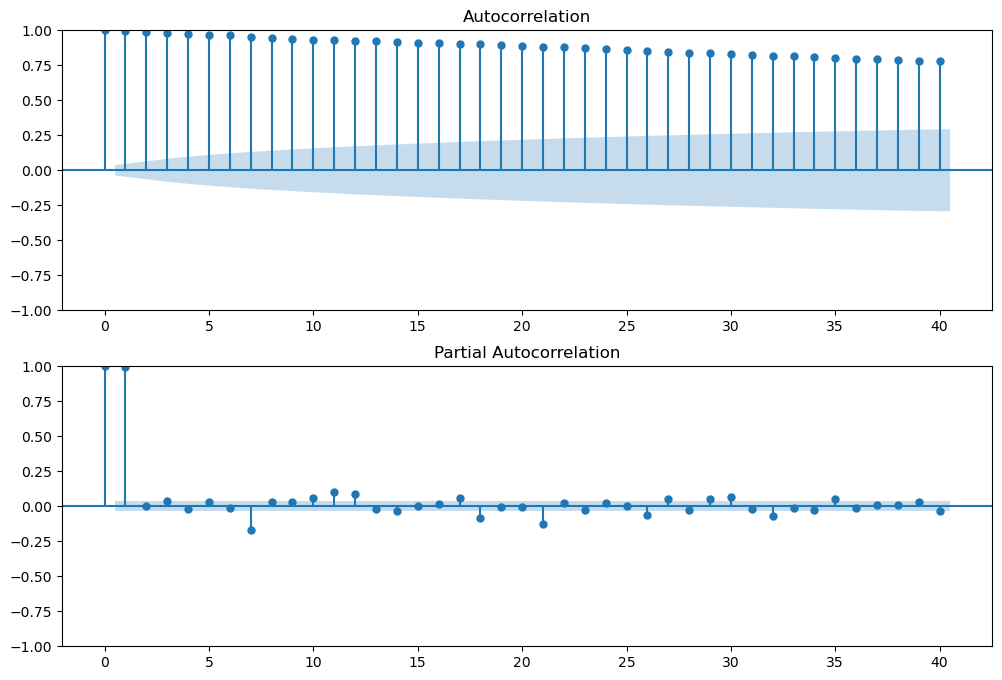

In [105]:

fig=plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig=sm.graphics.tsa.plot_acf(df['close'].iloc[13:],lags=40,ax=ax1)
ax2=fig.add_subplot(212)
fig=sm.graphics.tsa.plot_pacf(df['close'].iloc[13:],lags=40,ax=ax2)

In [131]:
#model building
#p=2 ,d=0, q=0
from statsmodels.tsa.arima.model import ARIMA

In [183]:
model=ARIMA(df['close'],order=(2,0,0))
model_fit=model.fit()

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consiste

In [185]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  close   No. Observations:                 2803
Model:                 ARIMA(2, 0, 0)   Log Likelihood              -15918.227
Date:                Wed, 03 Jul 2024   AIC                          31844.454
Time:                        16:47:51   BIC                          31868.208
Sample:                             0   HQIC                         31853.028
                               - 2803                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        113.7714      0.011   9968.803      0.000     113.749     113.794
ar.L1          1.0206      0.001    733.547      0.000       1.018       1.023
ar.L2         -0.0211      0.001    -15.690      0.000      -0.024      -0.018
sigma2      5002.6421      6.394    782.386      0.000    4990.110    5015.174
===================================================================================
Ljung-Box (L1) (Q):                   0.45   Jarque-Bera (JB):         368155910.45
Prob(Q):                              0.50   Prob(JB):                         0.00
Heteroskedasticity (H):               0.00   Skew:                           -37.30
Prob(H) (two-sided):                  0.00   Kurtosis:                      1776.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.62e+18. Standard errors may be unstable.
"""

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


<Axes: xlabel='date'>

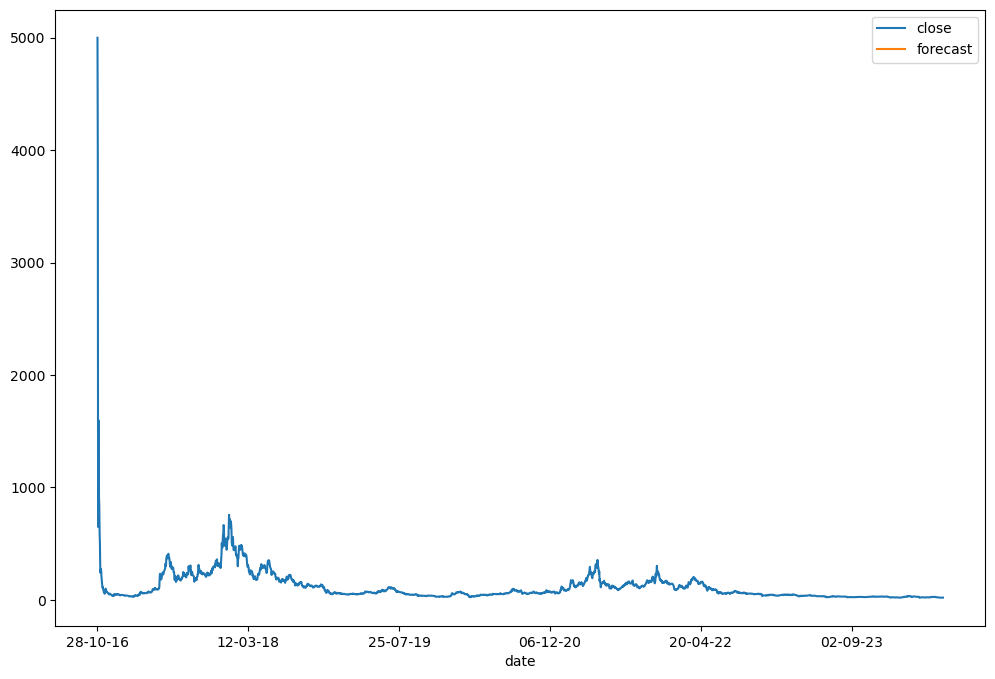

In [187]:
df['forecast']=model_fit.predict(start=19,end=5000,dynamic=True)
df[['close','forecast']].plot(figsize=(12,8))

In [173]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=y)for y in range(0,24)]

TypeError: can only concatenate str (not "DateOffset") to str

In [175]:
future_dataset_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

NameError: name 'future_dates' is not defined